In [1]:
import csv
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import datetime

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
df = pd.read_csv('trainData.csv')

In [6]:
df.head()

,Souce,Sink,Connected,Jaccard,Resource_alloc,Adamic_adar,Preferential_attachment,Common Neighbours,CN Sound-Hopcroft,Resoruce Alloc Index,Within Inner Cluster
0,1971490,4521813,1,0.036984,0.000705,2.360798,68598,26,52,0.000705,26000.0
1,2863976,926731,1,0.000000,0.000000,0.000000,32,0,0,0.000000,0.0
2,370525,3608160,1,0.000000,0.000000,0.000000,7371,0,0,0.000000,0.0
3,3682375,2984819,1,0.041580,0.065582,3.278562,29444,20,40,0.065582,20000.0
4,4342778,94321,1,0.000000,0.000000,0.000000,422,0,0,0.000000,0.0


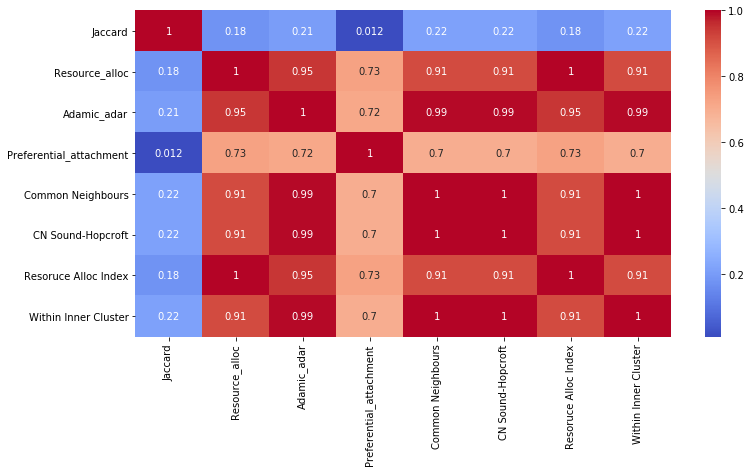

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True)

### Reading the dataset with the best score

In [8]:
df_best = pd.read_csv('high scores.csv')

In [9]:
df_best.columns = ['Id', 'SecondHighest', 'Highest']

In [10]:
df_best.head()

,Id,SecondHighest,Highest
0,1,0.484501,0.000000
1,2,0.554807,0.000010
2,3,0.484501,0.000000
3,4,0.935858,0.000465
4,5,0.617585,0.000089


## Train Test Split

In [11]:
X = df.drop(['Connected', 'Souce', 'Sink'], axis = 1)

In [12]:
y = df['Connected']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

## Random Forrest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(n_estimators=100)

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
predictions = rf.predict(X_test)

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1463
           1       0.80      0.80      0.80      1537

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000



## Reading in the Labels and Submit

In [26]:
label = pd.read_csv('testData.csv')

In [27]:
label.head()

,Souce,Sink,Jaccard,Resource_alloc,Adamic_adar,Preferential_attachment,Common Neighbours,CN Sound-Hopcroft,Resoruce Alloc Index,Within Inner Cluster
0,2184483,1300190,0.000000,0.000000,0.000000,435,0,0,0.000000,0.0
1,3151356,1452193,0.006260,0.000740,0.407705,102306,4,8,0.000740,4000.0
2,1579396,193159,0.000000,0.000000,0.000000,418,0,0,0.000000,0.0
3,1406432,2481036,0.062500,0.032617,1.238898,2838,7,14,0.032617,7000.0
4,2389638,593017,0.012072,0.006229,0.802812,62196,6,12,0.006229,6000.0


In [28]:
label_test = label.drop(['Souce', 'Sink'], axis = 1)

In [29]:
predictions = rf.predict_proba(label_test)

In [30]:
id_list = [x for x in range(1,2001)]

In [31]:
pred_list = [x for x in predictions[:,1]]

In [32]:
pred = pd.DataFrame(list(zip(id_list, pred_list)), columns=['Id','Predictions'])

In [33]:
pred.head()

,Id,Predictions
0,1,0.42600
1,2,0.36000
2,3,0.31731
3,4,0.98000
4,5,0.44000


In [35]:
far_from_best(pred)

1920

In [30]:
pred.to_csv(f'./submissions/submit_{datetime.datetime.now()}.csv', index=False)

In [18]:
def generate_submission(predictions):
    id_list = [x for x in range(1,2001)]
    pred_list = [x for x in predictions[:,1]]
    pred = pd.DataFrame(list(zip(id_list, pred_list)), columns=['Id','Predictions'])
    pred.to_csv(f'./submissions/submit_{datetime.datetime.now()}.csv', index=False)

In [19]:
def far_from_best(pred):
    count = 0
    for i in (df_best['SecondHighest'] - pred['Predictions']):
        if abs(i) >= 0.0101:
            count += 1
    
    return count

In [20]:
def create_pred(predictions):
    pred_list = [x for x in predictions[:,1]]
    pred = pd.DataFrame(list(zip(id_list, pred_list)), columns=['Id','Predictions'])
    return pred

In [91]:
def showFeatureImportance(model, X_train):
    #FEATURE IMPORTANCE
    # Get Feature Importance from the classifier
    feature_importance = model.feature_importances_

    # Normalize The Features
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    #X_cols = ["Jaccard", "Resource_alloc", "Adamic_adar", "Preferential_attachment", "Common Neighbours", "CN Sound-Hopcroft", "Resoruce Alloc Index", "Within Inner Cluster"]

    X_cols = X_train.columns
    
    #plot relative feature importance
    plt.figure(figsize=(12, 12))
    plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
    plt.yticks(pos, np.asanyarray(X_cols)[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importance')
    plt.show()

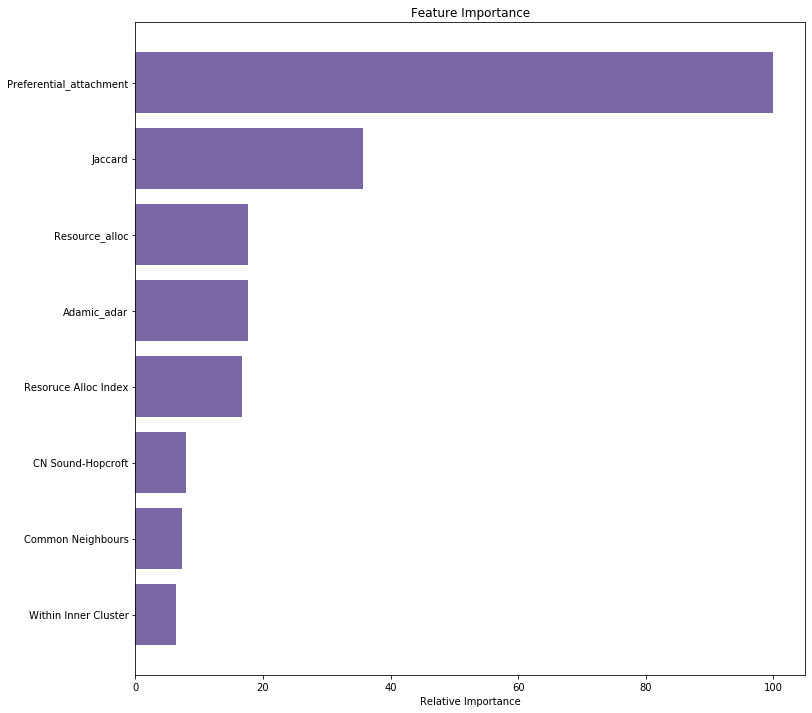

In [63]:
showFeatureImportance(rf)

## SVM Classifier

In [94]:
from sklearn.svm import SVC

In [143]:
svm = SVC(gamma='auto', C=0.1, probability=True)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.001)

In [145]:
svm.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [146]:
predictions = svm.predict_proba(label_test)

In [147]:
pred = create_pred(predictions)

In [148]:
far_from_best(pred)

1322

In [121]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.01, 0.1, 1, 10, 100]}
svc = SVC(kernel = 'rbf', gamma='auto', probability=True)
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print('>>>', clf.cv_results_)
print('>>>', clf.best_estimator_)

>>> {'mean_fit_time': array([ 6.80739651,  6.95426054,  9.82909775, 10.4636806 , 13.42329187]), 'std_fit_time': array([0.15308624, 0.14710535, 0.31224414, 0.45540406, 1.37049591]), 'mean_score_time': array([0.16668482, 0.16230707, 0.15888748, 0.17737837, 0.16353345]), 'std_score_time': array([0.00980615, 0.00405271, 0.00396425, 0.03516857, 0.00906898]), 'param_C': masked_array(data=[0.01, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}], 'split0_test_score': array([0.50025013, 0.52026013, 0.57228614, 0.57228614, 0.57078539]), 'split1_test_score': array([0.50025013, 0.53076538, 0.56678339, 0.56828414, 0.56828414]), 'split2_test_score': array([0.5       , 0.53353353, 0.56856857, 0.56506507, 0.56206206]), 'split3_test_score': array([0.50025038, 0.52378568, 0.56935403, 0.56935403, 0.56885328]), 'split4_test_score': array([0.50025038, 0.51927892, 0.5

In [139]:
predictions = clf.predict_proba(label_test)

In [140]:
pred = create_pred(predictions)

In [141]:
far_from_best(pred)

1727

In [150]:
generate_submission(predictions)

## Logistic Regression

In [182]:
from sklearn.linear_model import LogisticRegression

In [188]:
lr = LogisticRegression(solver='lbfgs', class_weight={0:0.5, 1:2}, C=0.1)
# use class_weight to change the weights

In [38]:
from sklearn.feature_selection import SelectFromModel

In [185]:
X_train.shape

(9990, 8)

In [189]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
model = SelectFromModel(lr, prefit=True)
X_new = model.transform(X_train)
X_new.shape

(7000, 1)

In [42]:
X_new

array([[22000.],
       [    0.],
       [ 1000.],
       ...,
       [    0.],
       [17000.],
       [ 1000.]])

In [43]:
predictions = lr.predict(X_test)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.57      0.63      1463
           1       0.65      0.75      0.70      1537

    accuracy                           0.66      3000
   macro avg       0.67      0.66      0.66      3000
weighted avg       0.67      0.66      0.66      3000



In [190]:
predictions = lr.predict_proba(label_test)

In [192]:
pred = create_pred(predictions)

In [194]:
far_from_best(pred)

1849

In [195]:
generate_submission(predictions)

In [46]:
pred_list = [x for x in predictions[:,1]]
pred = pd.DataFrame(list(zip(id_list, pred_list)), columns=['Id','Predictions'])

In [47]:
pred.head()

,Id,Predictions
0,1,0.499988
1,2,0.527574
2,3,0.499988
3,4,0.553054
4,5,0.543854


In [48]:
far_from_best(pred)

1817

In [49]:
lr.coef_

array([[ 4.77939826e-11,  2.73726467e-10,  5.37800883e-09,
        -1.12379989e-07,  3.04763568e-08,  6.09527135e-08,
         2.73726467e-10,  3.04763568e-05]])

In [50]:
lr_new = LogisticRegression()

In [51]:
lr_new.fit(X_new, y_train)

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predictions = lr.predict_proba(label_test)

In [53]:
pred_list = [x for x in predictions[:,1]]
pred = pd.DataFrame(list(zip(id_list, pred_list)), columns=['Id','Predictions'])

In [54]:
pred.head()

,Id,Predictions
0,1,0.499988
1,2,0.527574
2,3,0.499988
3,4,0.553054
4,5,0.543854


In [55]:
far_from_best(pred)

1817

## SGD Classifier

In [56]:
from sklearn.linear_model import SGDClassifier

In [57]:
clf = SGDClassifier(loss='log')

In [58]:
clf.fit(X,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
predictions = clf.predict_proba(label_test)

In [60]:
pred = create_pred(predictions)

In [61]:
far_from_best(pred)

1937

In [62]:
#pred
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

## Using XGBoost

In [78]:
from xgboost import XGBClassifier, XGBRegressor

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.001)

In [69]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [70]:
predictions = model.predict_proba(label_test)

In [71]:
pred = create_pred(predictions)

In [72]:
far_from_best(pred)

1852

In [77]:
generate_submission(predictions)

In [85]:
model2 = XGBClassifier(objective ='reg:tweedie', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 1, n_estimators = 1000)

In [86]:
model2.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.3, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=1, nthread=None,
              objective='reg:tweedie', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)

In [87]:
predictions = model2.predict_proba(label_test)

In [88]:
pred = create_pred(predictions)

In [89]:
far_from_best(pred)

1963

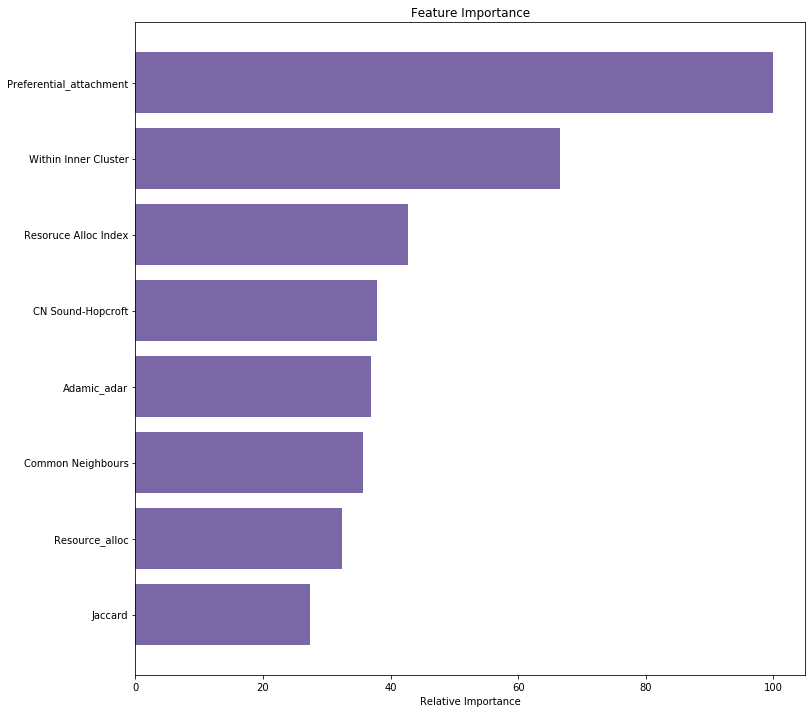

In [92]:
showFeatureImportance(model2, X_train)

## Multi Layer Perceptron (NN)

In [151]:
from sklearn.neural_network import MLPClassifier

In [169]:
nn = MLPClassifier(hidden_layer_sizes=(100, 150), activation='logistic', solver='sgd', learning_rate='adaptive')

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.001)

In [171]:
nn.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 150), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [164]:
predictions = nn.predict_proba(label_test)

In [165]:
pred = create_pred(predictions)

In [166]:
far_from_best(pred)

1494

In [167]:
generate_submission(predictions)

In [159]:
predictions

array([[0.48798196, 0.51201804],
       [0.5481187 , 0.4518813 ],
       [0.48654146, 0.51345854],
       ...,
       [0.5481187 , 0.4518813 ],
       [0.5481187 , 0.4518813 ],
       [0.54000443, 0.45999557]])

## KNearest Neighbours

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [174]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [175]:
predictions = knn.predict_proba(label_test)

In [180]:
predictions[:,1]

array([0.4 , 0.  , 0.75, ..., 0.  , 0.  , 0.75])

In [177]:
pred = create_pred(predictions)

In [179]:
far_from_best(pred)

1927

In [181]:
generate_submission(predictions)